<a href="https://colab.research.google.com/github/KanLi1002/Priority-Matrix-for-Lead-Molecule-Selection/blob/main/Priority_Matrix_for_Lead_Molecule_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-f9e9a682add6>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df['Potency'], df['Toxicity'], df['Stability'], c=colors, s=100, cmap='viridis', edgecolors='k')


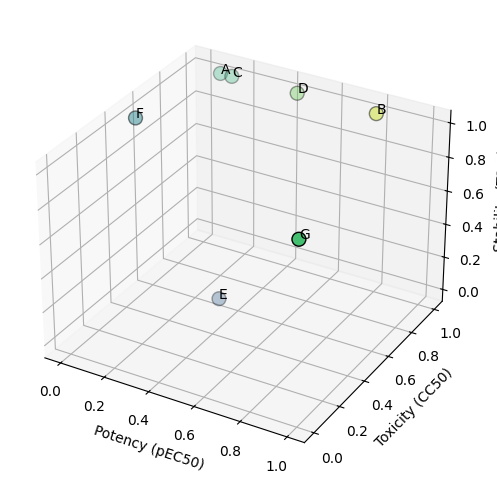

  Molecule     Score
1        B  0.915789
3        D  0.775439
6        G  0.700000
2        C  0.656140
0        A  0.635088
5        F  0.450600
4        E  0.302533


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

# Sample Data: Replace with real values
molecules = {
    'Molecule': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'Potency': [5.40, 5.80, 5.43, 5.60, 5.54, 5.35, 5.92],  # pEC50 values
    'Toxicity': [100, 100, 100, 100, 78.2, 75.1, 50],  # IC50 values in uM
    'Stability': [145, 145, 145, 145, 70.1, 145, 145]  # T1/2 values in min
}

df = pd.DataFrame(molecules)

# Normalize values (Potencys like EC50 convert into pEC50 since higher pEC50 is better)
scaler = MinMaxScaler()
df[['Potency', 'Toxicity', 'Stability']] = scaler.fit_transform(
    np.column_stack((df['Potency'], df['Toxicity'], df['Stability']))
)

# Assign weights
weights = {'Potency': 0.4, 'Toxicity': 0.3, 'Stability': 0.3}
df['Score'] = (df['Potency'] * weights['Potency'] +
               df['Toxicity'] * weights['Toxicity'] +
               df['Stability'] * weights['Stability'])

# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Color mapping by priority score
colors = plt.cm.viridis(df['Score'])
ax.scatter(df['Potency'], df['Toxicity'], df['Stability'], c=colors, s=100, cmap='viridis', edgecolors='k')

# Labels
ax.set_xlabel('Potency (pEC50)')
ax.set_ylabel('Toxicity (CC50)')
ax.set_zlabel('Stability (T1/2)')

# Annotate points
for i, row in df.iterrows():
    ax.text(row['Potency'], row['Toxicity'], row['Stability'], row['Molecule'], fontsize=10)

plt.savefig('lead_molecule_selection.svg', format='svg')
plt.show()

# Display ranking
df = df.sort_values(by='Score', ascending=False)
print(df[['Molecule', 'Score']])
